- This sample notebook allows one to create wordclouds from a given text. 
- A helper module is used.
- One may also run sentiment analysis on the texts.

In [1]:
pip install -q -r ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [157]:
%run imports.py
%run helper_functions.ipynb
# %run dataprofile.ipynb

In [148]:
# data download link : https://query.data.world/s/b7x4ttsdai5fmzxjwr5jw6pfyh7tpe 
# data : amazon phone reviews
filename = "amazon_one_plus_reviews.json" 
data = load_data(filename, 'reviewed_at')

display(data)

orig_data_rows = data.shape[0]

print(data.info())

Columns : Index(['product', 'product_company', 'profile_name', 'review_title',
       'review_rating', 'review_text', 'helpful_count', 'total_comments',
       'review_country', 'reviewed_at', 'url', 'crawled_at', '_id',
       'verified_purchase', 'color', 'style_name', 'size_name', 'category',
       'sub_category', 'images'],
      dtype='object') 

Rows    : 30612 



,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
6671,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Halbinder singh,Good,4.0 out of 5 stars,\n Ok\n,0,0,India,2020-10-18,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:35:40,6cc179a9-cedc-5d38-a3f0-66e91e8fb5ed,Verified Purchase,Gray Onyx,8GB RAM + 128GB Storage,na,electronics,mobiles,[]
29842,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Kalyan,Worst performance mobile,1.0 out of 5 stars,\n Performance is very slow because of MIUI. ...,0,0,India,2020-10-17,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:38:54,f83574ee-de72-52c0-8179-86c9154df41d,Verified Purchase,Interstellar Black,4GB RAM+ 64GB Storage,na,electronics,mobiles,[]
8775,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Not upto the hype created,3.0 out of 5 stars,\n Display and camera quality are not upto th...,0,0,India,2020-10-17,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:37:06,f35fd9cf-bb29-5fe8-b4a0-7c5c4a0cacb2,Verified Purchase,na,na,na,electronics,mobiles,[]
2364,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Mohamed ashiq,Awesome,5.0 out of 5 stars,\n Simply worthy awesome phone worthy for pri...,0,0,India,2020-10-17,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:26:51,5ac917fe-3532-5045-9f97-d5e79862f017,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
6108,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,LOKESH SURYA,A perfect all rounder in budget sigment,4.0 out of 5 stars,\n Little tweaks need to be done by software ...,0,0,India,2020-10-17,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:34:53,e5955a5c-b019-5e74-8c72-a57358df6469,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",Redmi,Ajith R,2weeks im using this phone,5.0 out of 5 stars,"\n If you google camera, then it beats note 8...",One person found this helpful,0,India,2019-11-06,https://www.amazon.in/product-reviews/B07X1KT6...,2020-10-18 15:37:21,2b46f2ef-34a3-53c4-9d91-a33967311db1,Verified Purchase,Neptune Blue,na,4+64GB,electronics,mobiles,[]
13663,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",Redmi,Chainpal singh,Lovely,5.0 out of 5 stars,\n Good product\n,One person found this helpful,0,India,2019-11-06,https://www.amazon.in/product-reviews/B07X1KT6...,2020-10-18 15:41:39,585623cf-b94d-5ad9-ac83-7cb784c31346,Verified Purchase,Neptune Blue,na,4+64GB,electronics,mobiles,[]
9543,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",Redmi,MD ASADULLAH TABISH,Value for money,5.0 out of 5 stars,\n Superb mobile under 10k.,9 people found this helpful,0,India,2019-11-06,https://www.amazon.in/product-reviews/B07X1KT6...,2020-10-18 15:35:34,ff84eeaa-27a6-5577-99c5-bd07f5147a79,Verified Purchase,Moonlight White,na,4+64GB,electronics,mobiles,[]
17897,"Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Stor...",Redmi,Laxmana,Best,4.0 out of 5 stars,\n Good mobile\n,0,0,India,2019-11-06,https://www.amazon.in/product-reviews/B07X1KT6...,2020-10-18 16:17:08,68985c64-d77b-50ac-82cd-fff24247e9c1,Verified Purchase,Space Black,na,4+64GB,electronics,mobiles,[]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30612 entries, 6671 to 9530
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product            30612 non-null  object        
 1   product_company    30612 non-null  object        
 2   profile_name       30612 non-null  object        
 3   review_title       30612 non-null  object        
 4   review_rating      30612 non-null  object        
 5   review_text        30612 non-null  object        
 6   helpful_count      30612 non-null  object        
 7   total_comments     30612 non-null  int64         
 8   review_country     30612 non-null  object        
 9   reviewed_at        30612 non-null  datetime64[ns]
 10  url                30612 non-null  object        
 11  crawled_at         30612 non-null  datetime64[ns]
 12  _id                30612 non-null  object        
 13  verified_purchase  30612 non-null  object        
 14  colo

In [149]:
data.review_rating = data.review_rating.apply(lambda x: int(x[0]))

In [150]:
colname = 'reviewed_at'
limiting_val = datetime.datetime.now() - datetime.timedelta(days=912) # last 2.5 years 
data = filter_data(data, colname, limiting_val, condition_val='greater than')
print(f"Reduction in rows (%) : {100*(orig_data_rows - data.shape[0]) / orig_data_rows}")

Filtered data shape : (11395, 20)
Reduction in rows (%) : 62.77603554161767


<AxesSubplot: title={'center': 'Product by count(Product)'}, ylabel='product'>

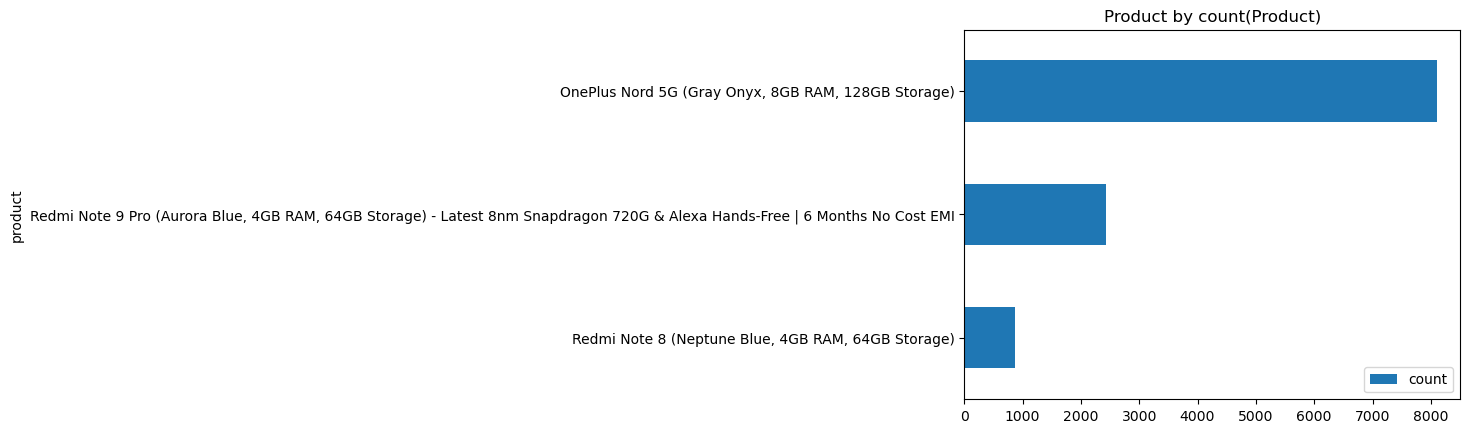

In [151]:
grouped_cnt = data.groupby('product')['product'].agg({'count'}).sort_values('count')
grouped_cnt.tail(15).plot.barh(title='Product by count(Product)') # n records for each category in table desc.

In [152]:
# get grouped datasets that can be looped based on category. 
# plot word clouds for grouped datasets.

list_of_dfs, sizes = manual_groupby(data, 'product')
print("Count grouped dataframes : ",len(list_of_dfs))

Count grouped dataframes :  3


/var/folders/n1/yjnsy0tn3yd7c9l1w2d_gjlw0000gq/T/ipykernel_23160/3540038670.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(list_of_dfs)[limit_returned_results]:


OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)
Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage) - Latest 8nm Snapdragon 720G & Alexa Hands-Free | 6 Months No Cost EMI
Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)


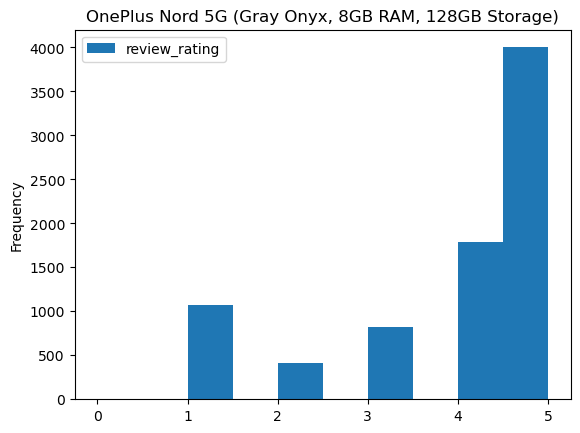

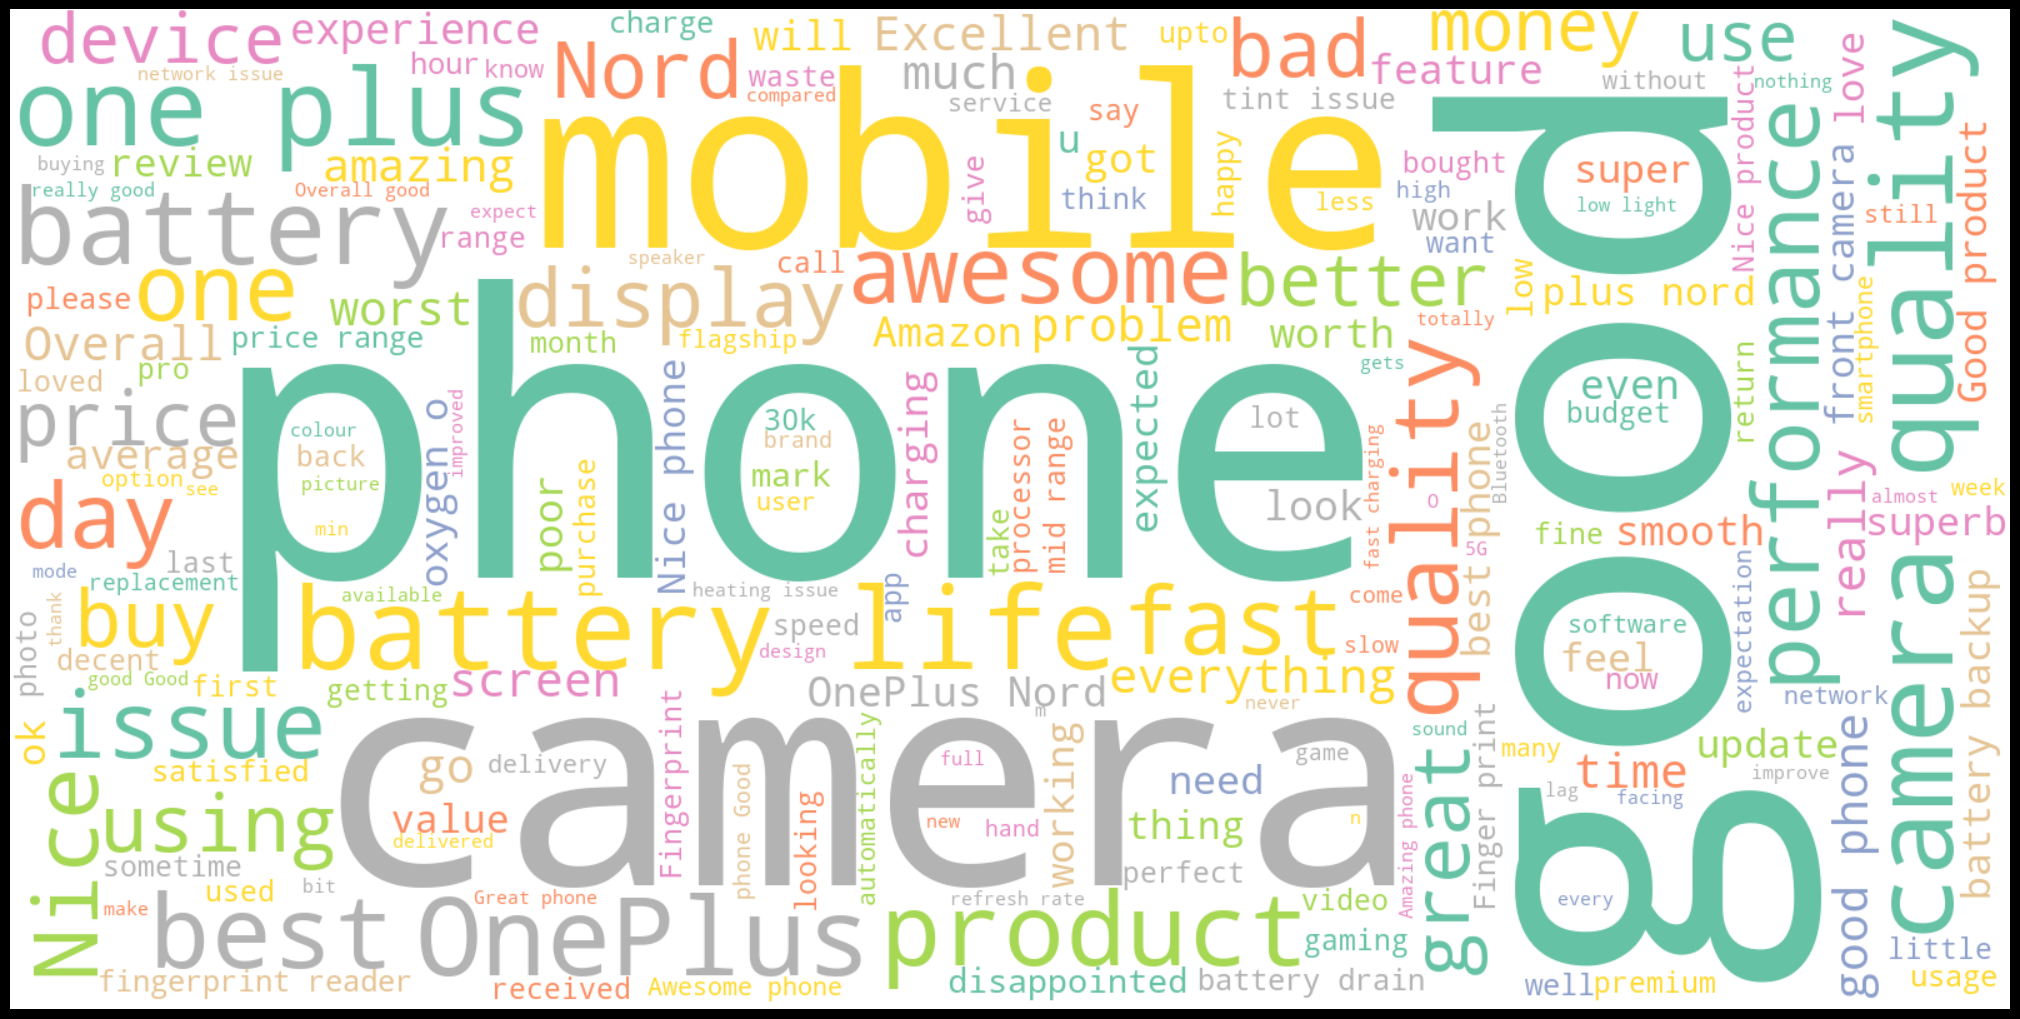

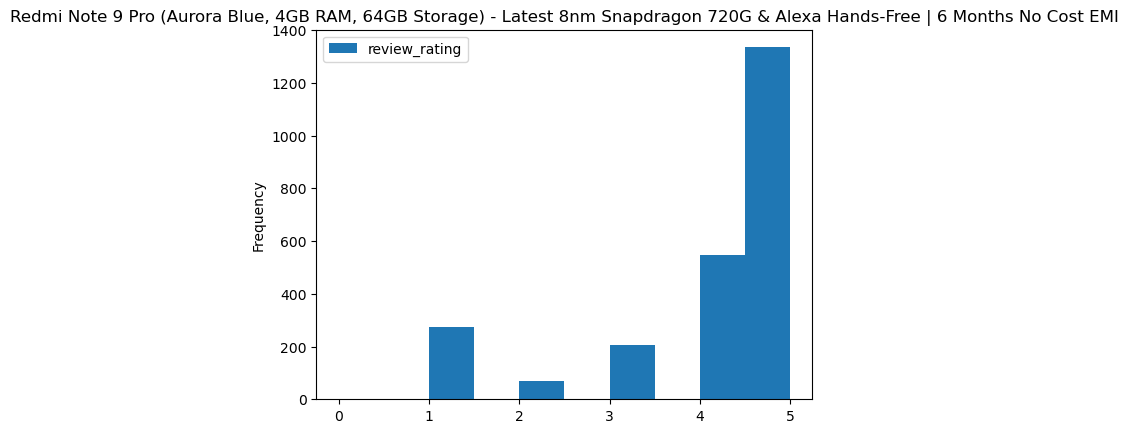

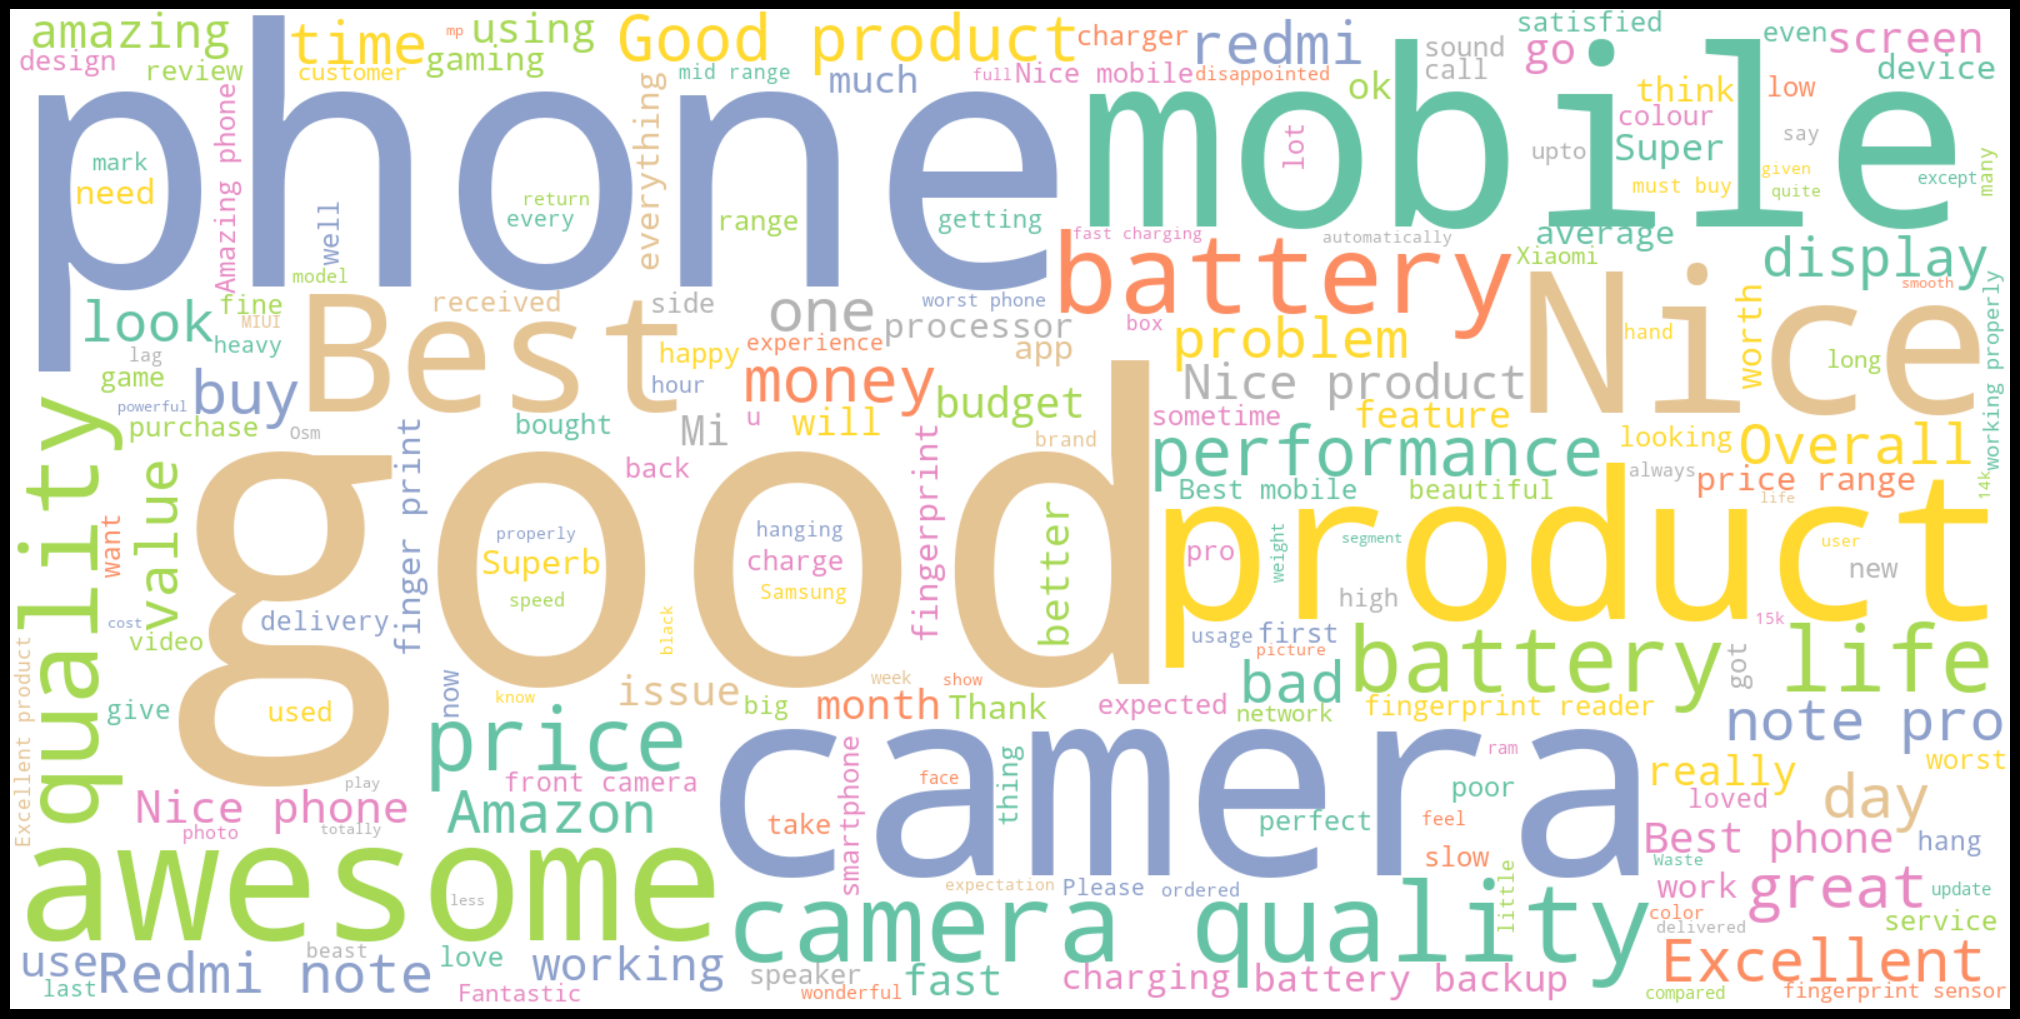

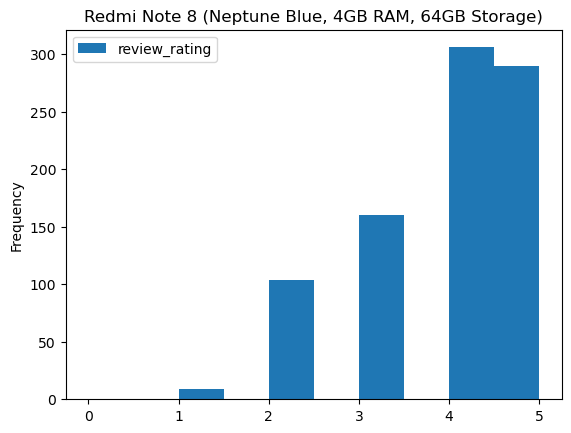

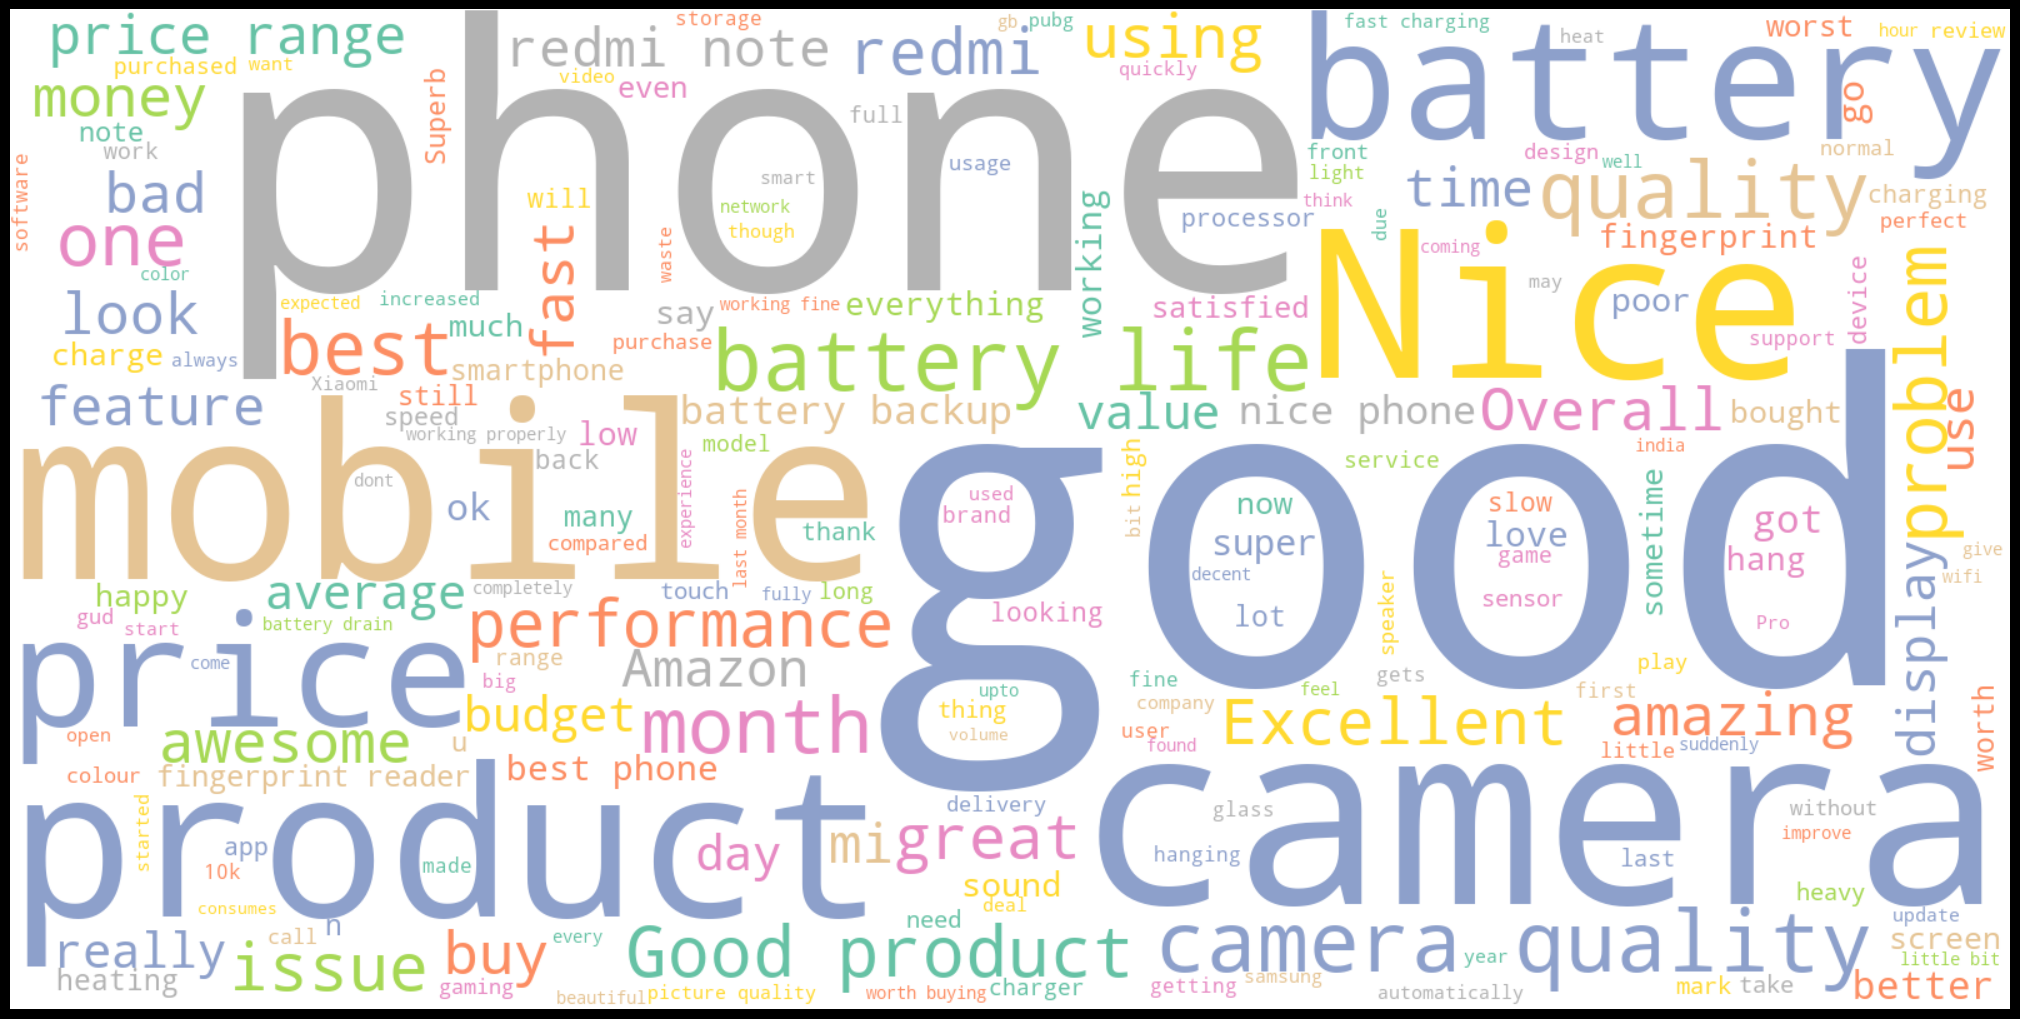

In [153]:
%matplotlib inline

plot_grouped_data(list_of_dfs, sizes , 'review_text', 'review_rating', to_limit=True, n_limit=3) # change n_limit to see more categories (when exists)

In [158]:
data = get_sentiment(data, 'review_text')
data

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,...,_id,verified_purchase,color,style_name,size_name,category,sub_category,images,sentiment_polarity,sentiment_subjectivity
6671,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Halbinder singh,Good,4,\n Ok\n,0,0,India,2020-10-18,...,6cc179a9-cedc-5d38-a3f0-66e91e8fb5ed,Verified Purchase,Gray Onyx,8GB RAM + 128GB Storage,na,electronics,mobiles,[],0.500000,0.500000
29842,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Kalyan,Worst performance mobile,1,\n Performance is very slow because of MIUI. ...,0,0,India,2020-10-17,...,f83574ee-de72-52c0-8179-86c9154df41d,Verified Purchase,Interstellar Black,4GB RAM+ 64GB Storage,na,electronics,mobiles,[],-0.695000,0.760000
8775,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Not upto the hype created,3,\n Display and camera quality are not upto th...,0,0,India,2020-10-17,...,f35fd9cf-bb29-5fe8-b4a0-7c5c4a0cacb2,Verified Purchase,na,na,na,electronics,mobiles,[],0.000000,0.000000
2364,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Mohamed ashiq,Awesome,5,\n Simply worthy awesome phone worthy for pri...,0,0,India,2020-10-17,...,5ac917fe-3532-5045-9f97-d5e79862f017,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...,0.666667,1.000000
6108,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,LOKESH SURYA,A perfect all rounder in budget sigment,4,\n Little tweaks need to be done by software ...,0,0,India,2020-10-17,...,e5955a5c-b019-5e74-8c72-a57358df6469,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[],0.156250,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Kindle Customer,unsatisfied with one plus and this phone is no...,1,\n very pour camera quality and any other goo...,One person found this helpful,1,India,2020-08-12,...,11df277c-2435-566f-b16a-71a30a85b0f7,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...,-0.014167,0.406944
26444,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Vitthal vishe,REDMI NOTE 9 PRO,5,\n NOTE 9 PRO\n,0,0,India,2020-08-12,...,204fa4ae-1380-5847-bb3d-ad6698c476fb,Verified Purchase,Interstellar Black,4GB RAM+ 64GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...,0.000000,0.000000
6118,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Anshad,Not that much,4,\n Camara not as much good as poco x2 battery...,0,0,India,2020-08-12,...,8bd4834e-ad35-56e2-94cf-b32ac2ddf635,Verified Purchase,na,na,na,electronics,mobiles,[],0.256250,0.550000
5116,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Rajkannu nataraj,Worth of product,4,\n Awesome product.,0,0,India,2020-08-12,...,c48ca88a-89f0-592f-89a8-4c9e65617bdf,Verified Purchase,Gray Onyx,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...,1.000000,1.000000


In [ ]:
# helpful links:

## tutorials 
# https://github.com/nasirsoft93/python/blob/master/WordCloud.txt | https://www.youtube.com/watch?v=9niTBDNp-l4
# https://www.youtube.com/watch?v=3LfPuT1-FL4 


# debug links 
# https://stackoverflow.com/questions/46986560/wordlistcorpusreader-is-not-iterable
# https://stackoverflow.com/questions/55998672/how-to-fix-this-typeerror-sequence-item-0-expected-str-instance-float-found 
